<a href="https://colab.research.google.com/github/gabriellysilva-git/Bootcamp_WomakersCode/blob/main/Desafio_Frequencia_Medidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Estatística Frequências e Medidas - Desafio Final**

Considerando a base de dados de enem_2023.json responda as questões abaixo (os dados são fictícios). Você é uma pesquisadora de um cursinho para estudantes que querem ingressar na universidade em 2025. Seu objetivo é retirar informações da base de dados do enem do ano anterior para alinhar melhor as estratégias do cursinho para cada estudante. O dado possui 6 colunas, 5 delas representam as disciplinas do ENEM e uma o gênero das pessoas que fizeram a prova. No dado existe a representação de 1000 pessoas, sendo cada uma delas uma linha.

In [3]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo JSON
url = "https://raw.githubusercontent.com/gabriellysilva-git/Bootcamp_WomakersCode/refs/heads/main/desafio_frequencia_medidas/enem_2023.json"
df = pd.read_json(url)

# Verificar os dados
print("Primeiras linhas do DataFrame:")
print(df.head())

Primeiras linhas do DataFrame:
   Linguagens  Ciências humanas  Ciências da natureza  Matemática     Redação  \
0  585.669300        686.512178            390.482473  452.281333  546.371706   
1  359.384608        642.084134                   NaN  412.205207  741.825256   
2  622.732384        495.510719            443.183580  669.683401  684.515750   
3  350.164605        602.041588            413.979810  676.608952  671.237114   
4  384.093657        489.249140            609.758123  520.426698  744.375048   

     Sexo  
0   Homem  
1  Mulher  
2   Homem  
3   Homem  
4   Homem  


1. Qual das disciplinas tem a maior amplitude de nota?

In [4]:
# Calcular a amplitude para cada disciplina
amplitude = {
    "Linguagens": df["Linguagens"].max() - df["Linguagens"].min(),
    "Ciências humanas": df["Ciências humanas"].max() - df["Ciências humanas"].min(),
    "Ciências da natureza": df["Ciências da natureza"].max() - df["Ciências da natureza"].min(),
    "Matemática": df["Matemática"].max() - df["Matemática"].min(),
    "Redação": df["Redação"].max() - df["Redação"].min()
}

# Encontrar a disciplina com a maior amplitude
disciplina_maior_amplitude = max(amplitude, key=amplitude.get)
print(f"\n1. A disciplina com a maior amplitude de nota é: {disciplina_maior_amplitude}")


1. A disciplina com a maior amplitude de nota é: Redação


2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se de remover todos os valores nulos quando considerar a mediana)

In [5]:
# Calcular média e mediana para cada disciplina
print("\n2. Média e Mediana por disciplina:")
for disciplina in ["Linguagens", "Ciências humanas", "Ciências da natureza", "Matemática", "Redação"]:
    media = df[disciplina].mean()
    mediana = df[disciplina].median()
    print(f"{disciplina}: Média = {media:.2f}, Mediana = {mediana:.2f}")


2. Média e Mediana por disciplina:
Linguagens: Média = 514.52, Mediana = 515.05
Ciências humanas: Média = 527.04, Mediana = 524.52
Ciências da natureza: Média = 499.32, Mediana = 500.48
Matemática: Média = 535.97, Mediana = 533.25
Redação: Média = 637.78, Mediana = 635.27


3. Considerando o curso de Ciência da Computação da UFPE, onde o peso cada uma das disciplinas ponderado: a. Redação - 2 b. Matemática e suas Tecnologias - 4 c. Linguagens, Códigos e suas Tecnologias - 2 d. Ciências Humanas e suas Tecnologias - 1 e. Ciências da Natureza e suas Tecnologias - 1 Qual o desvio padrão e média das notas dos 500 estudantes mais bem colocados considerando esses pesos?

In [15]:
# Calcular a nota ponderada
df["Nota_Ponderada"] = (
    (df["Redação"] * 2) +
    (df["Matemática"] * 4) +
    (df["Linguagens"] * 2) +
    (df["Ciências humanas"] * 1) +
    (df["Ciências da natureza"] * 1)
) / 10  # Dividir pela soma dos pesos (2 + 4 + 2 + 1 + 1 = 10)

# Verificar a nota ponderada
print("Primeiras linhas com a nota ponderada:")
print(df[["Redação", "Matemática", "Linguagens", "Ciências humanas", "Ciências da natureza", "Nota_Ponderada"]].head())

# Selecionar os 500 melhores com base na nota ponderada
top_500 = df.nlargest(500, "Nota_Ponderada")

# Calcular média e desvio padrão
media_top_500 = top_500["Nota_Ponderada"].mean()
desvio_padrao_top_500 = top_500["Nota_Ponderada"].std()

print(f"\n3. Média dos 500 melhores (corrigida): {media_top_500:.2f}")
print(f"   Desvio padrão dos 500 melhores (corrigido): {desvio_padrao_top_500:.2f}")

Primeiras linhas com a nota ponderada:
      Redação  Matemática  Linguagens  Ciências humanas  Ciências da natureza  \
0  546.371706  452.281333  585.669300        686.512178            390.482473   
1  741.825256  412.205207  359.384608        642.084134                   NaN   
2  684.515750  669.683401  622.732384        495.510719            443.183580   
3  671.237114  676.608952  350.164605        602.041588            413.979810   
4  744.375048  520.426698  384.093657        489.249140            609.758123   

   Nota_Ponderada  
0      515.020199  
1             NaN  
2      623.192417  
3      576.526064  
4      543.765146  

3. Média dos 500 melhores (corrigida): 557.29
   Desvio padrão dos 500 melhores (corrigido): 40.44


4. Se todos esses estudantes aplicassem para ciência da computação e existem apenas 40 vagas, qual seria a variância e média da nota dos estudantes que entraram no curso de ciência da computação?

In [16]:
# Selecionar os 40 melhores com base na nota ponderada corrigida
top_40 = df.nlargest(40, "Nota_Ponderada")

# Calcular média e variância
media_top_40 = top_40["Nota_Ponderada"].mean()
variancia_top_40 = top_40["Nota_Ponderada"].var()

print(f"\n4. Média dos 40 melhores (corrigida): {media_top_40:.2f}")
print(f"   Variância dos 40 melhores (corrigida): {variancia_top_40:.2f}")


4. Média dos 40 melhores (corrigida): 636.68
   Variância dos 40 melhores (corrigida): 295.77


5. Qual o valor do teto do terceiro quartil para as disciplinas de matemática e linguagens?

In [8]:
# Calcular o terceiro quartil (Q3) para Matemática e Linguagens
q3_matematica = df["Matemática"].quantile(0.75)
q3_linguagens = df["Linguagens"].quantile(0.75)

print(f"\n5. Terceiro quartil (Q3) de Matemática: {q3_matematica:.2f}")
print(f"   Terceiro quartil (Q3) de Linguagens: {q3_linguagens:.2f}")


5. Terceiro quartil (Q3) de Matemática: 592.91
   Terceiro quartil (Q3) de Linguagens: 571.64


6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos. Podemos dizer que são histogramas simétricos, justifique e classifique se não assimétricas?

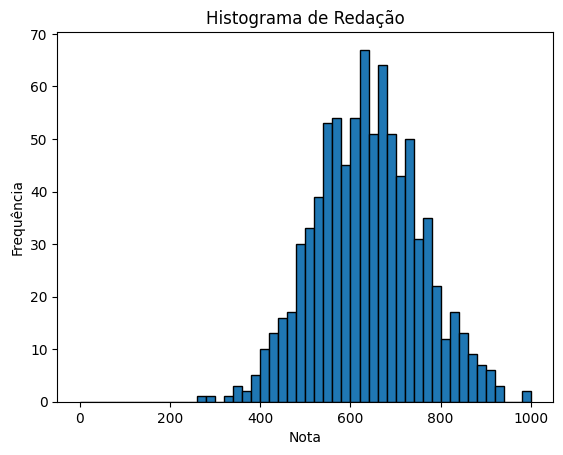

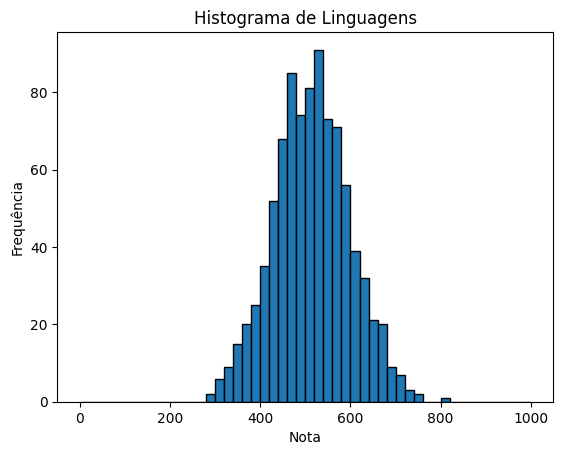

In [9]:
# Histograma de Redação
plt.hist(df["Redação"].dropna(), bins=range(0, 1001, 20), edgecolor="black")
plt.title("Histograma de Redação")
plt.xlabel("Nota")
plt.ylabel("Frequência")
plt.show()

# Histograma de Linguagens
plt.hist(df["Linguagens"].dropna(), bins=range(0, 1001, 20), edgecolor="black")
plt.title("Histograma de Linguagens")
plt.xlabel("Nota")
plt.ylabel("Frequência")
plt.show()

7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])

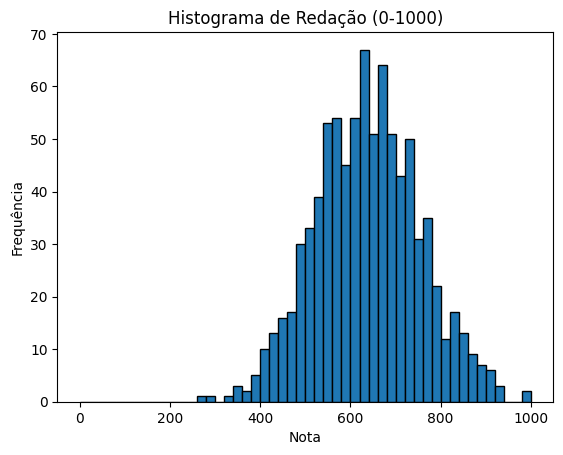

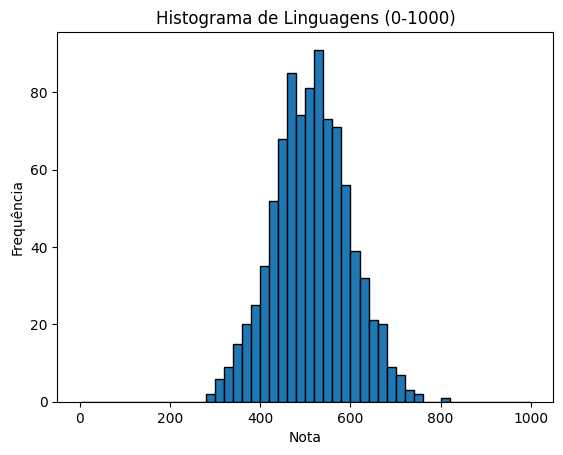

In [10]:
# Histograma de Redação com range fixo
plt.hist(df["Redação"].dropna(), bins=range(0, 1001, 20), range=[0, 1000], edgecolor="black")
plt.title("Histograma de Redação (0-1000)")
plt.xlabel("Nota")
plt.ylabel("Frequência")
plt.show()

# Histograma de Linguagens com range fixo
plt.hist(df["Linguagens"].dropna(), bins=range(0, 1001, 20), range=[0, 1000], edgecolor="black")
plt.title("Histograma de Linguagens (0-1000)")
plt.xlabel("Nota")
plt.ylabel("Frequência")
plt.show()

8. Faça um boxplot para as notas de Ciências da Natureza e Redação, analisando os quartis e identificando possíveis outliers. Utilize o método IQR (Intervalo Interquartílico) para essa análise.

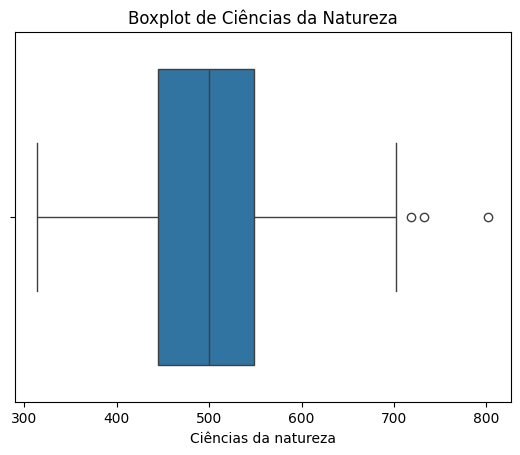

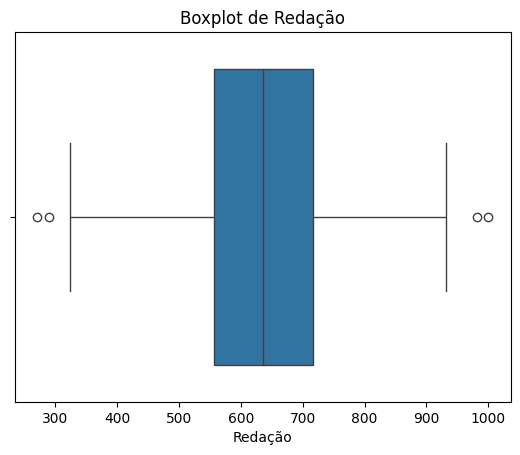


8. Outliers em Ciências da Natureza: 325    802.004568
482    732.502964
483    718.396061
Name: Ciências da natureza, dtype: float64
   Outliers em Redação: 9       270.839965
545     290.308608
720    1000.000000
870     981.016553
Name: Redação, dtype: float64


In [17]:
# Boxplot de Ciências da Natureza
sns.boxplot(x=df["Ciências da natureza"].dropna())
plt.title("Boxplot de Ciências da Natureza")
plt.show()

# Boxplot de Redação
sns.boxplot(x=df["Redação"].dropna())
plt.title("Boxplot de Redação")
plt.show()

# Função para detectar outliers usando o método IQR
def detectar_outliers(coluna):
    Q1 = coluna.quantile(0.25)
    Q3 = coluna.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return coluna[(coluna < limite_inferior) | (coluna > limite_superior)]

# Detectar outliers em Ciências da Natureza e Redação
outliers_cn = detectar_outliers(df["Ciências da natureza"].dropna())
outliers_redacao = detectar_outliers(df["Redação"].dropna())

print(f"\n8. Outliers em Ciências da Natureza: {outliers_cn}")
print(f"   Outliers em Redação: {outliers_redacao}")

9. Remova todos os outliers e verifique se eles são passíveis de alterar a média nacional significativamente? (considere significativamente um valor acima de 5%)

In [18]:
# Remover outliers
df_sem_outliers = df[
    ~df["Ciências da natureza"].isin(outliers_cn) &
    ~df["Redação"].isin(outliers_redacao)
]

# Calcular média antes e depois
media_antes = df["Ciências da natureza"].mean()
media_depois = df_sem_outliers["Ciências da natureza"].mean()

diferenca_percentual = abs((media_depois - media_antes) / media_antes) * 100
print(f"\n9. Diferença percentual na média após remover outliers: {diferenca_percentual:.2f}%")


9. Diferença percentual na média após remover outliers: 0.23%


10. Considerando valores nulos, tente encontrar qual seria a melhor medida de tendência que pode substituir as notas nulas. Média, moda ou mediana? Substitua o valor por todos os três e diga qual delas altera menos a média geral e o desvio padrão.

In [19]:
# Substituir valores nulos por média, moda ou mediana
df["Linguagens_media"] = df["Linguagens"].fillna(df["Linguagens"].mean())
df["Linguagens_moda"] = df["Linguagens"].fillna(df["Linguagens"].mode()[0])
df["Linguagens_mediana"] = df["Linguagens"].fillna(df["Linguagens"].median())

# Comparar impacto na média
media_original = df["Linguagens"].mean()
media_media = df["Linguagens_media"].mean()
media_moda = df["Linguagens_moda"].mean()
media_mediana = df["Linguagens_mediana"].mean()

print(f"\n10. Média original: {media_original:.2f}")
print(f"    Média após substituir por média: {media_media:.2f}")
print(f"    Média após substituir por moda: {media_moda:.2f}")
print(f"    Média após substituir por mediana: {media_mediana:.2f}")


10. Média original: 514.52
    Média após substituir por média: 514.52
    Média após substituir por moda: 491.09
    Média após substituir por mediana: 514.58
